In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle

sys.path.append("../../simulator/")

from tissue import *
%matplotlib inline

def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

def load_object(filename):
    with open(filename, 'rb') as outp:  # Overwrites any existing file.
        return pickle.load(outp)
        

In [3]:
exp_data = load_object('../../experiment/ablation.pkl')

av_edu_pc = exp_data['expDivrate']/exp_data['ctrDivrate']
se_edu_pc = exp_data['expSEDivrate']/exp_data['ctrDivrate']
ct_edu_pc = 1.0

av_bas = exp_data['expDensity']
sd_bas = exp_data['expSEDensity']

av_bas_exp = exp_data['expBasalsize']
se_bas_exp = exp_data['expSEBasalsize']

av_tot_exp = exp_data['expTotalsize']
se_tot_exp = exp_data['expSETotalsize']

tdr = exp_data['expTimeDivrate']
tds = exp_data['expTimeDensity']
te  = exp_data['expTimeClonesize']


In [ ]:
sys.path.append("../../fitting")


from tissue import *
import tissplot as tplt
import analysis
import sim_model as sm

np.random.seed(0)

L = 15
tsteps = 1000


tau   = 5000
shed = 0.4*tau

rho =  0.9
r = 0.2

Ahigh = 1.5
tadiv = 150

ncells = L**2


t0 = sm.SD_mech_switch(ncells, L, tau, r, rho,  shed = shed, tadiv = tadiv, 
                       switch_profile = 'binary', hilln = 10, Ahigh= Ahigh, useTerm=True)

results = t0.sim(tsteps = 1000, dt = 0.01, Dr = 0.0, v0 = 0.0, mu = 1.0,  
                 kA = 1.0, kP = 1.0, A0 = 1.0, p0 = 3.5, plot = False)

points = t0.cellpoints % L

results1 = t0.simFull(tsteps = 4000, dt = 0.01, Dr = 0.0, v0 = 0.0, mu = 1.0, kA = 1.0, kP = 1.0, A0 = 1.0, p0 = 3.5, plot = False)

points = t0.cellpoints % L

tplt.plotBCD(results1)

t1 = t0.copy()
t1.reset()

resultsC = t1.simFull(tsteps = 5000, dt = 0.01, Dr = 0.0, v0 = 0.0, mu = 1.0,  
                 kA = 1.0, kP = 1.0, A0 = 1.0, p0 = 3.5, plot = False, save_shape = False,
                 skip = 1, verbose = True)


tplt.plotBCD(resultsC)
plt.show()


# Save results
resultsC['tissue'] = t1
save_object(resultsC, 'ForFigures.pkl')


In [8]:
# Load saved simulation

results = load_object('ForFigures.pkl')
t1 = results['tissue']
L = 15
rate = 0
r = 0
resultsC = results

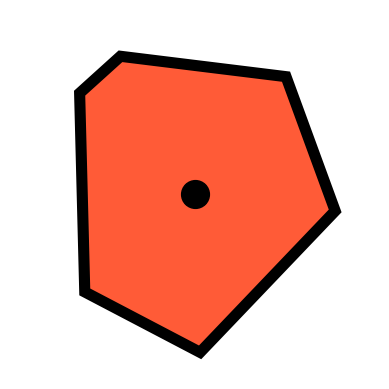

In [5]:
#Cells by type: S cell


tt = 400
realidx = 150

results = resultsC

pos = results['cellpos'][tt]
ncells = results['ncells']
npts = np.sum(results['ncells'][tt])
numS = results['ncells'][tt][1]
popidx = np.ones(npts, dtype = np.int32)
bridges = {}
cellid  = results['cellid'][tt]
saveskip = 1


xlims = [(pos[realidx,0]) - 0.8, (pos[realidx,0]) + 0.8]
ylims = [(pos[realidx,1]) - 0.8, (pos[realidx,1]) + 0.8]


#plt.figure()
popidx[0:(npts - numS)] = 0
tiss = tissue(pos, L = L, pop_idx = popidx, divtime = [-1.0, 1], divprob = [0.0, 0.0], assprob = [0.0, 0.0], difprob = [0.0, 0.0], terprob = [1.0, 1.0], conserve = None,Alow = [0.0, 0.0], Ahigh = [100.0, 1.6], rule = ['stochastic', 'size'])

points = tiss.cellpoints % L

region = tiss.regions[tiss.point_region[realidx]]
polygon = [tiss.vertices[i] for i in region]
plt.fill(*zip(*polygon), '#FF5B37', linestyle = '-', linewidth=8, edgecolor='k')        
plt.plot(pos[realidx,0], pos[realidx,1], 'ko', markersize = 20)


plt.xticks([])
plt.yticks([])
plt.axis('square')
plt.axis('off')

plt.xlim([0,L])
plt.ylim([0,L])    
plt.xlim(xlims)
plt.ylim(ylims)
#plt.xlim([3.5,6])
#plt.ylim([4.2,6.7]) 
plt.savefig('S_cells.svg', bbox_inches='tight')
plt.show()


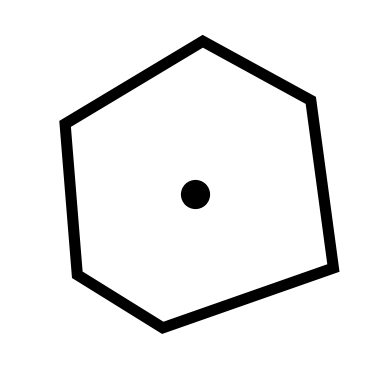

In [6]:
#Cells by type: D cell

tt = 0
realidx = 50

pos = results['cellpos'][tt]
ncells = results['ncells']
npts = np.sum(results['ncells'][tt])
numS = results['ncells'][tt][1]
popidx = np.ones(npts, dtype = np.int32)
bridges = {}
cellid  = results['cellid'][tt]
saveskip = 1


xlims = [(pos[realidx,0]) - 0.8, (pos[realidx,0]) + 0.8]
ylims = [(pos[realidx,1]) - 0.8, (pos[realidx,1]) + 0.8]


#plt.figure()
popidx[0:(npts - numS)] = 0
tiss = tissue(pos, L = L, pop_idx = popidx, divtime = [-1.0, 1], divprob = [0.0, 0.0], assprob = [0.0, 0.0], difprob = [0.0, 0.0], terprob = [1.0, 1.0], conserve = None,Alow = [0.0, 0.0], Ahigh = [100.0, 1.6], rule = ['stochastic', 'size'])

points = tiss.cellpoints % L

region = tiss.regions[tiss.point_region[realidx]]
polygon = [tiss.vertices[i] for i in region]
plt.fill(*zip(*polygon), 'white', linestyle = '-', linewidth=8, edgecolor='k')        
plt.plot(pos[realidx,0], pos[realidx,1], 'ko', markersize = 20)


plt.xticks([])
plt.yticks([])
plt.axis('square')
plt.axis('off')

plt.xlim([0,L])
plt.ylim([0,L])    
plt.xlim(xlims)
plt.ylim(ylims)
plt.savefig('TA_cells.svg', bbox_inches='tight')
plt.show()


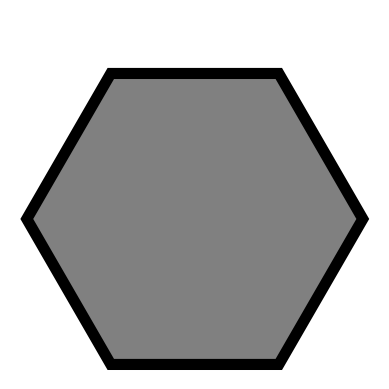

In [7]:
#Cells by type: differentiated cell


polygon = np.array([[1,0],[1/2,np.sqrt(3)/2],[-1/2,np.sqrt(3)/2],[-1,0],[-1/2,-np.sqrt(3)/2],[1/2,-np.sqrt(3)/2]])/(2*np.sqrt(3))
plt.fill(*zip(*polygon), 'grey', linestyle = '-', linewidth=8, edgecolor='k')        
plt.xticks([])
plt.yticks([])
plt.axis('square')
plt.axis('off')
plt.savefig('D_cells.svg', bbox_inches='tight')
plt.show()


In [6]:
def plot_event(results, tt, ttt, totrack, highlight = None):
    edgecolor = 'k' #'FFE262'
    pos = results['cellpos'][tt]
    ncells = results['ncells']
    npts = np.sum(results['ncells'][tt])
    numS = results['ncells'][tt][1]
    popidx = np.ones(npts, dtype = np.int32)
    cellid  = results['cellid'][tt]
    
    nowidx = np.where(results['cellid'][ttt] == totrack)[0][0]
    pos0 = results['cellpos'][ttt]
    xlims = [(pos0[nowidx,0]) - 1.2, (pos0[nowidx,0]) + 1.2]
    ylims = [(pos0[nowidx,1]) - 1.2, (pos0[nowidx,1]) + 1.2]


    popidx[0:(npts - numS)] = 0
    tiss = tissue(pos, L = L, pop_idx = popidx, divtime = [-1.0, rate], divprob = [0.0, 0.0], assprob = [0.0, (1 - 2*r)/(1 - r)], difprob = [0.0, 0.0], terprob = [1.0, 1.0], conserve = None,Alow = [0.0, 0.0], Ahigh = [100.0, 1.6], rule = ['stochastic', 'size'])
    points = tiss.cellpoints % L
    for j in range(tiss.splits[1], tiss.splits[2]):
        region = tiss.regions[tiss.point_region[j]]
        polygon = [tiss.vertices[i] for i in region]
        plt.fill(*zip(*polygon), '#FF5B37', linewidth=3.5, edgecolor='k', alpha = 0.3)
        
    for j in range(tiss.splits[0], tiss.splits[1]):
        region = tiss.regions[tiss.point_region[j]]
        polygon = [tiss.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color = '#FF5B37', linewidth=3.5, edgecolor='k', alpha = 0.3)

    for j in highlight[tt]:
        realidx = np.where(cellid == j)[0][0]
        region = tiss.regions[tiss.point_region[realidx]]
        polygon = [tiss.vertices[i] for i in region]
        plt.plot(pos[realidx,0], pos[realidx,1], 'ko', markersize = 15)
        if j in t1.cellpops[1].parent:
            plt.fill(*zip(*polygon), 'r', linestyle = '-', linewidth=12, edgecolor = edgecolor)
        else:
            plt.fill(*zip(*polygon), 'white', linestyle = '-', linewidth=12, edgecolor = edgecolor) 
            

    plt.xticks([])
    plt.yticks([])
    plt.axis('square')  
    plt.xlim(xlims)
    plt.ylim(ylims)            

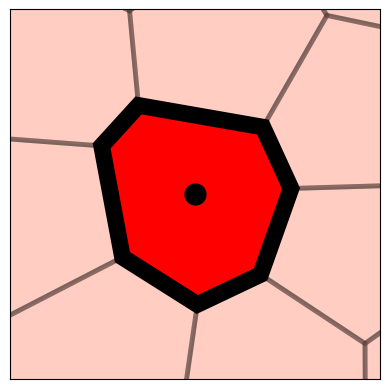

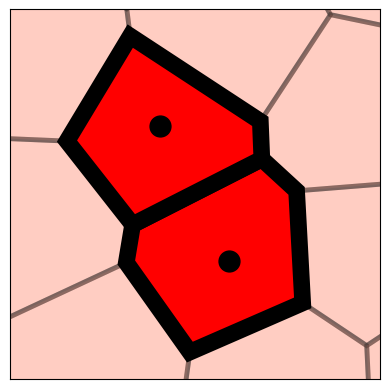

In [9]:
#Symmetric division

results = resultsC


rate = 100
ttt = 232
totrack = 509
shift = 10
highlight = {ttt: [totrack], (ttt + shift): [758, 759]}

for tt in [ttt, ttt + shift]:
    plot_event(results, tt, ttt, totrack, highlight)
    plt.savefig('Symmdiv_' + str(tt) + '.svg', bbox_inches='tight')
    plt.show()
    

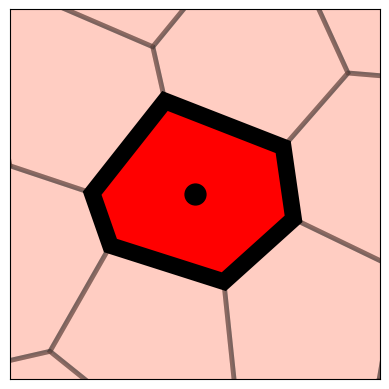

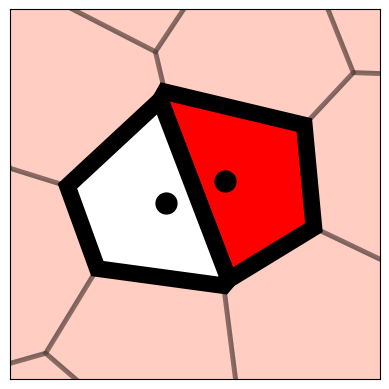

In [13]:
#Assymetric division 

#results = resultsC


rate = 100
ttt = 274
totrack = 424
shift = 10
highlight = {ttt: [totrack], (ttt + shift): [764, 765]}

for tt in [ttt, ttt + shift]:
    plot_event(results, tt, ttt, totrack, highlight)
    plt.savefig('Assym_unpairdiv_' + str(tt) + '.svg', bbox_inches='tight')
    plt.show()
    

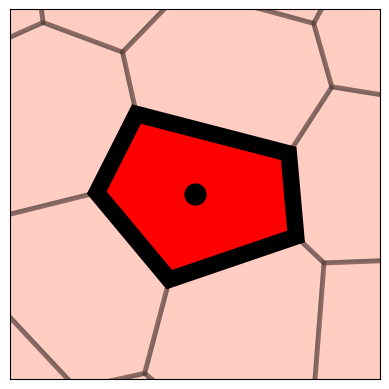

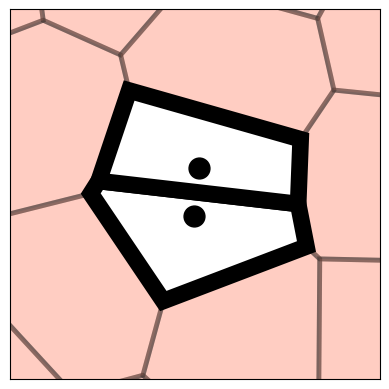

In [15]:
#Symmetric differentiation 

#results = resultsC


rate = 100
ttt = 3055
totrack = 974
shift = 8
highlight = {ttt: [totrack], (ttt + shift): [997, 998]}

for tt in [ttt, ttt + shift]:
    plot_event(results, tt, ttt, totrack, highlight)
    plt.savefig('SymmDiffS_pairdiv_' + str(tt) + '.svg', bbox_inches='tight')
    plt.show()
    

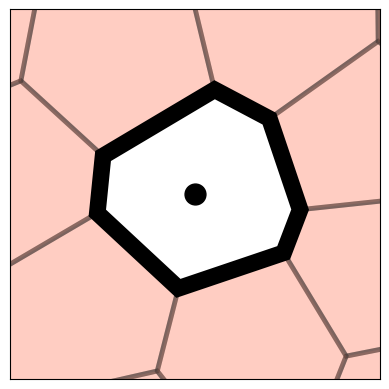

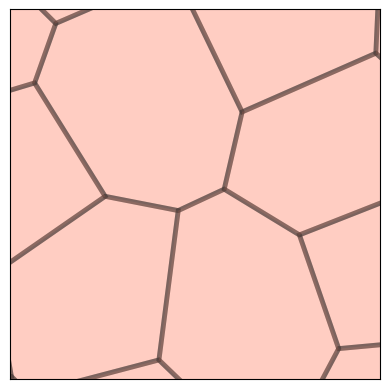

In [17]:
#Delamination

#results = resultsC


rate = 100
ttt = 3119
totrack = 939
shift = 10
highlight = {ttt: [totrack], (ttt + shift): []}

for tt in [ttt, ttt + shift]:
    plot_event(results, tt, ttt, totrack, highlight)
    plt.savefig('SymmDiffS_' + str(tt) + '.svg', bbox_inches='tight')
    plt.show()
    

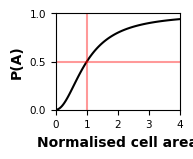

In [77]:
def hill(x, n = 2):
    return x**n/(1 + x**n)

from matplotlib import rcParams

# Set global font properties
rcParams['font.family'] = 'sans-serif'
rcParams['font.weight'] = 'normal'

# Set global font size for all axes
rcParams['axes.labelsize'] = 10
rcParams['axes.labelweight'] = 'bold'
rcParams['xtick.labelsize'] = 7.5
rcParams['ytick.labelsize'] = 7.5
rcParams['legend.fontsize'] = 7.5
rcParams['font.size'] = 7.5  # General font size
rcParams['text.usetex'] = False
rcParams['svg.fonttype'] = 'none'
rcParams['lines.markersize']  = 3
rcParams['lines.linewidth']  = 1.5


x = np.linspace(0,4,101)

plt.figure(figsize = (1.6,1.25))
plt.margins(x=0) 
plt.margins(y=0) 
plt.plot(x, hill(x, 10), 'k')
plt.yticks([0,0.5,1.0])
plt.xticks([0,1,2,3,4])
plt.vlines(1, 0, 1, 'r', linestyle = '-', alpha = 0.4)
plt.hlines(0.5, 0, 4, 'r', linestyle = '-', alpha = 0.4)
plt.xlabel('Normalised cell area')
plt.ylabel('P(A)')
plt.ylim([0,1])
plt.xlim([0,4])
plt.savefig('hill.svg', bbox_inches='tight')
plt.show()

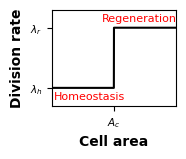

In [74]:
x = np.linspace(0,4,1001)

plt.figure(figsize = (1.6,1.25))
plt.margins(x=0) 
plt.margins(y=0) 
plt.plot(x, (x < 2)*0.25 + (x >= 2)*0.75, 'k')
plt.yticks([0,0.5,1.0])
plt.xticks([2], labels=[r'$A_c$'])
plt.yticks([0.25,0.75], [r'$\lambda_h$',r'$\lambda_r$'])
plt.xlabel('Cell area')
plt.ylabel('Division rate')
plt.text(0.07, 0.15, 'Homeostasis',  fontsize = 8, color = 'r')
plt.text(1.6, 0.8, 'Regeneration', fontsize = 8, color = 'r')
plt.ylim([0.1,0.9])
plt.xlim([0,4])
plt.savefig('divrate.svg', bbox_inches='tight')
plt.show()